# Lab - XOR  
Unsolvable XOR

In [ ]:

import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=1000)

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])



# Solving XOR problem - Neural network

In [12]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=2, input_dim=2))
tf.model.add(tf.keras.layers.Activation('sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
tf.model.add(tf.keras.layers.Activation('sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(lr=0.1),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=2000, verbose=0) # Changing epochs

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 2)                 6         
                                                                 
 activation_14 (Activation)  (None, 2)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 3         
                                                                 
 activation_15 (Activation)  (None, 1)                 0         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 49ms/step
Prediction: 
 [[0.50624233]
 [0.5058413 ]
 [0.50182176]
 [0.50196147]]
1/1 [=========================

In [6]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=2, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# SGD not working very well due to vanishing gradient problem, switched to Adam for now
# or you may use activation='relu', study chapter 10 to know more on vanishing gradient problem.
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(lr=0.3), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=1000, verbose=0)

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                30        
                                                                 
 dense_20 (Dense)            (None, 20)                220       
                                                                 
 dense_21 (Dense)            (None, 100)               2100      
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3371 (13.17 KB)
Trainable params: 3371 (13.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 80ms/step


Prediction: 
 [[0.00633367]
 [0.99011236]
 [0.9904475 ]
 [0.0071571 ]]
1/1 [==============================] - 0s 139ms/step - loss: 0.0083 - accuracy: 1.0000
Accuracy:  1.0


# 인공신경망(Artificial Neural Network)

* 인간 두뇌에 대한 계산적 모델을 통해 인공지능을 구현하려는 분야
* 인간의 뇌 구조를 모방: 뉴런과 뉴런 사이에는 전기신호를 통해 정보를 전달  

## 생물학적 신경세포와 인공신경망 비교

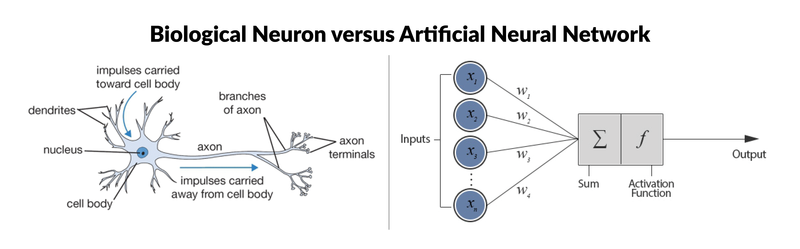

* 신경세포(Neuron)
  - 수상돌기(樹狀突起, Dendrite) : 다른 신경세포의 축색돌기와 연결되어 전기화학적 신호를 받아들이는 부위
  - 축색돌기(軸索突起, Axon) : 수신한 전기화학적 신호의 합성결과 값이 특정 임계값이 이상이면 신호를 내보는 부위
  - 신경연접(神經連接, Synapse) : 수상돌기와 축색돌기 연결 부위, 전달되는 신호의 증폭 또는 감쇄


* 인공 뉴런(Artificial Neuron)
  - 신경세포 구조를 단순화하여 모델링한 구조
  - 노드(Node)와 엣지(Edge)로 표현
  - 하나의 노드안에서 입력(Inputs)와 가중치(Weights)를 곱하고 더하는 선형구조(linear)
  - 활성화 함수(activation function)를 통한 비선형 구조(non-linear) 표현 가능

* 인공 신경망(Artificial Neural Network)
  - 여러 개의 인공뉴런들이 모여 연결된 형태
  - 뉴런들이 모인 하나의 단위를 층(layer)이라고 하고, 여러 층(multi layer)으로 이루어질 수 있음
  - ex) 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)